<a href="https://colab.research.google.com/github/zachmakki15/ADVDS/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
#import data visualization and data analysis libs
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd

#import csv file from github
dataFile = pd.read_csv('https://raw.githubusercontent.com/zachmakki15/ADVDS/main/forestfires.csv');

In [126]:
#display data File details
dataFile

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [127]:
#List columns from dataset
for col in dataFile.columns:
  print(col)

#describe the data set
dataFile.describe()

X
Y
month
day
FFMC
DMC
DC
ISI
temp
RH
wind
rain
area


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


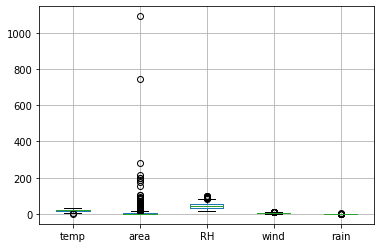

In [128]:
#Create a box plot of area, temp, RH, wind, and rain
dataFile.boxplot(column=['temp','area', 'RH', 'wind', 'rain'])

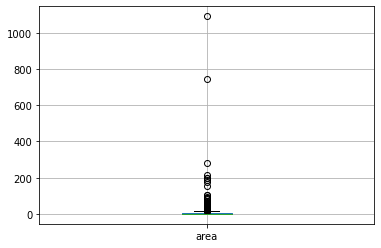

In [129]:
#Area values are to large compared to other columns to do a proper comparsion, box plots will be broken up first the output boxplot
dataFile.boxplot(column=['area'])

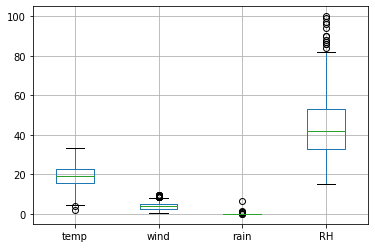

In [130]:
#Now the attributes boxplot
dataFile.boxplot(column=['temp', 'wind', 'rain', 'RH'])

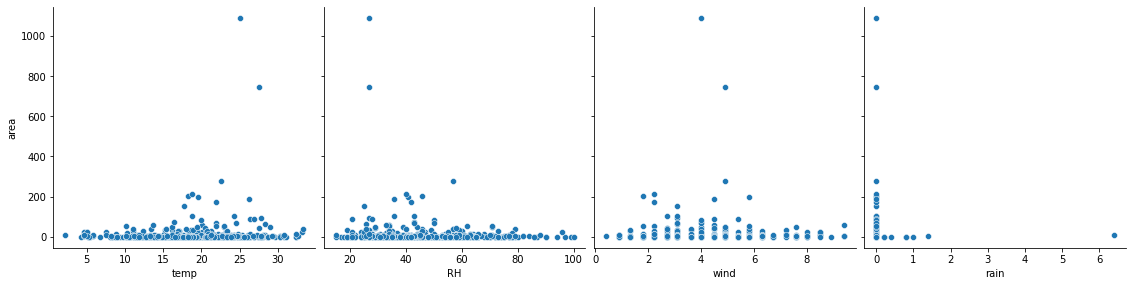

In [131]:
#Scatter plot where area=y, and attributes=x
sbn.pairplot(dataFile, x_vars=['temp', 'RH', 'wind', 'rain'], y_vars=['area'], height=4, aspect=1, kind='scatter')
plt.show();

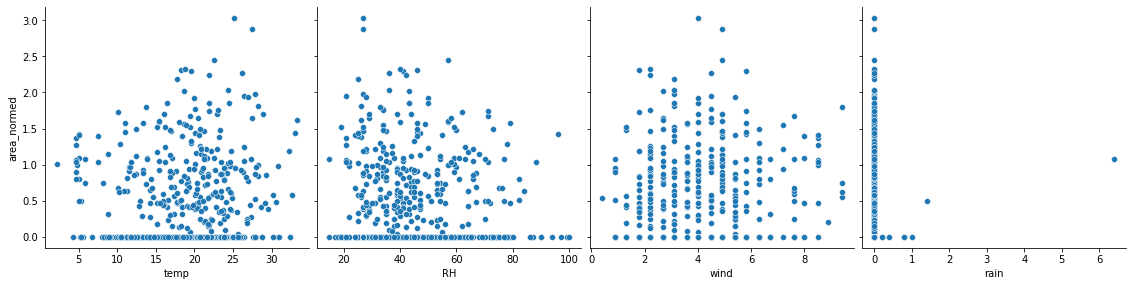

In [132]:
#As instructed in the data set information provided by UCI the output 'area' will be normalized using natural log+1
#The scatter plot below will show how the normalization makes linear regression possible for the temp, RH, and wind attributes
#To perform the normalization numpy is imported
import numpy as np
dataFile['area_normed'] = np.log10(dataFile['area']+1)
sbn.pairplot(dataFile, x_vars=['temp', 'RH', 'wind', 'rain'], y_vars=['area_normed'], height=4, aspect=1, kind='scatter')
plt.show()

Area and Temp

In [133]:
#import linear model to do linear regression on normalized area and temp
from sklearn import linear_model
lm = linear_model.LinearRegression()

#reshape columns to fit the lm fit method
x = dataFile['temp'].values.reshape(-1,1)
y = dataFile['area_normed'].values.reshape(-1,1)

lm.fit(x, y)

#Get the intercept and slope
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(0.3768402195781929, 0.0055943246406643336)

Linear Model: area = 0.3768 + 0.0055 * temp

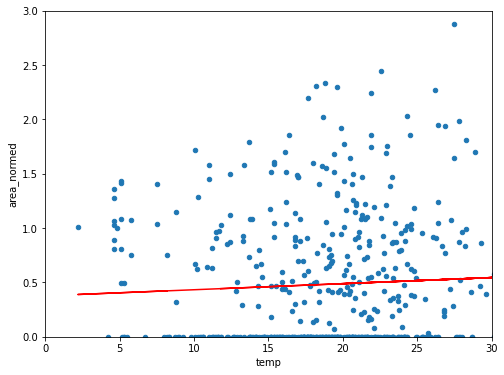

In [134]:
#Plot the linear regression just created
dataFile.plot(kind='scatter', x='temp', y='area_normed', figsize=(8, 6))
plt.axis([0, 30, 0, 3])
plt.plot(x, t0 + t1*x, "r")
plt.show()

In [135]:
#Now lets run the same linear regression but this time breaking up the datatset into a 70/30 train-test split
from sklearn.model_selection import train_test_split

#break up data set
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
x_train.shape
x_test.shape

lm.fit(x_train, y_train)

#Get the intercept and slope
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(0.42468643392039046, 0.0037482702267584165)

Linear Model: area = 0.4247 + 0.0037 * temp

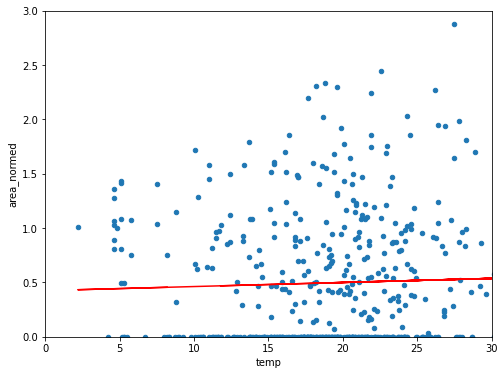

In [136]:
#Plot the new linear regression w/70/30 test-train split
dataFile.plot(kind='scatter', x='temp', y='area_normed', figsize=(8, 6))
plt.axis([0, 30, 0, 3])
plt.plot(x, t0 + t1*x, "r")
plt.show()

In [137]:
#Use the model to make predictions then use R^2 and MSE to evaluate the predictions made
#First import the needed r2 and mse methods from sklearn
from sklearn.metrics import r2_score, mean_squared_error

#Next train the model using the test data
y_training_predictions = lm.predict(x_train)
y_test_predictions = lm.predict(x_test)

#Print the scores
r2_temp = r2_score(y_test, y_test_predictions)
mse_temp = mean_squared_error(y_test, y_test_predictions)
print('R2 score:',            r2_score(y_test, y_test_predictions))
print('Mean squared error:', mean_squared_error(y_test, y_test_predictions))

R2 score: 0.0012241650872253373
Mean squared error: 0.3270995217964014


Area and RH (relative humdity)

In [138]:
#reshape a new x for RH
x = dataFile['RH'].values.reshape(-1,1)
y = dataFile['area_normed'].values.reshape(-1,1)

#break data up into new test and train datasets using the same 80/20 split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
x_train.shape
x_test.shape

lm.fit(x_train, y_train)

#Get the intercept and slope
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(0.6077977519253043, -0.002570647914716015)

Linear Model: area = 0.6078 + -0.0026 * RH

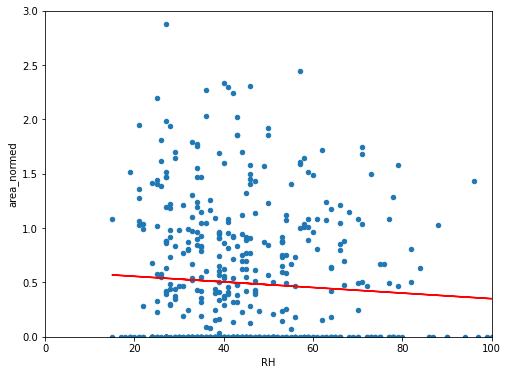

R2 score: -0.006936158768294787
Mean squared error: 0.3297720314202226


In [139]:
#Plot the new linear regression for area and RH
dataFile.plot(kind='scatter', x='RH', y='area_normed', figsize=(8, 6))
plt.axis([0, 100, 0, 3])
plt.plot(x, t0 + t1*x, "r")
plt.show()

#Next train the model using the test data
y_training_predictions = lm.predict(x_train)
y_test_predictions = lm.predict(x_test)

#Print the scores
print('R2 score:',            r2_score(y_test, y_test_predictions))
print('Mean squared error:', mean_squared_error(y_test, y_test_predictions))
r2_RH = r2_score(y_test, y_test_predictions)
mse_RH = mean_squared_error(y_test, y_test_predictions)

Area and Wind

In [140]:
#reshape a new x for wind
x = dataFile['wind'].values.reshape(-1,1)
y = dataFile['area_normed'].values.reshape(-1,1)

#break data up into new test and train datasets using the same 80/20 split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
x_train.shape
x_test.shape

lm.fit(x_train, y_train)

#Get the intercept and slope
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(0.4099853195527445, 0.020738882240385816)

Linear Model: area = 0.4099 + 0.0207 * wind

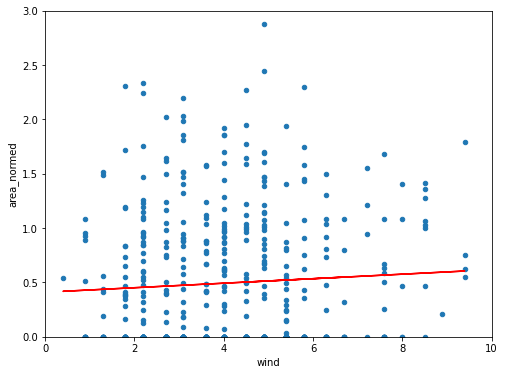

R2 score: 0.0018358361087020825
Mean squared error: 0.32689919926993655


In [141]:
#Plot the new linear regression w/70/30 test-train split
dataFile.plot(kind='scatter', x='wind', y='area_normed', figsize=(8, 6))
plt.axis([0, 10, 0, 3])
plt.plot(x, t0 + t1*x, "r")
plt.show()

#Next train the model using the test data
y_training_predictions = lm.predict(x_train)
y_test_predictions = lm.predict(x_test)

#Print the scores
print('R2 score:',            r2_score(y_test, y_test_predictions))
print('Mean squared error:', mean_squared_error(y_test, y_test_predictions))
r2_wind = r2_score(y_test, y_test_predictions)
mse_wind = mean_squared_error(y_test, y_test_predictions)

Area and Rain

In [142]:
#reshape a new x for wind
x = dataFile['rain'].values.reshape(-1,1)
y = dataFile['area_normed'].values.reshape(-1,1)

#break data up into new test and train datasets using the same 80/20 split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
x_train.shape
x_test.shape

lm.fit(x_train, y_train)

#Get the intercept and slope
t0, t1 = lm.intercept_[0], lm.coef_[0][0]
t0, t1

(0.4990834335426999, -0.6023420749653277)

Linear Model: area = 0.4991 + -0.6023 * rain

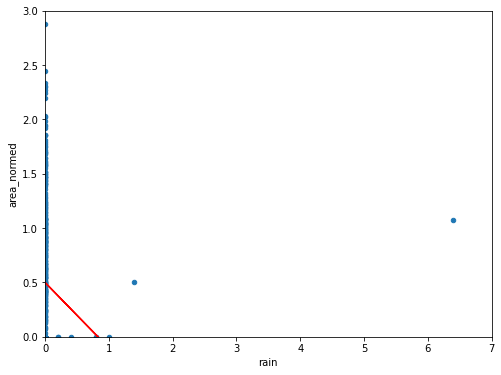

R2 score: -0.39171284536021367
Mean squared error: 0.4557865641943481


In [143]:
#Plot the new linear regression w/70/30 test-train split
dataFile.plot(kind='scatter', x='rain', y='area_normed', figsize=(8, 6))
plt.axis([0, 7, 0, 3])
plt.plot(x, t0 + t1*x, "r")
plt.show()

#Next train the model using the test data
y_training_predictions = lm.predict(x_train)
y_test_predictions = lm.predict(x_test)

#Print the scores
print('R2 score:',            r2_score(y_test, y_test_predictions))
print('Mean squared error:', mean_squared_error(y_test, y_test_predictions))
r2_rain = r2_score(y_test, y_test_predictions)
mse_rain = mean_squared_error(y_test, y_test_predictions)

Results:

Overall linear regression did not work well for any of the attributes temp, wind, rain, or RH (relative humidty). This is because the data for attributes wind, temp, and RH was highly scattered, and for rain there was a high correlation between 0 rainfall and greater then 0 area burned. 

Based on the data presented below while none of the attributes were well suited for linear regression temp and wind performed the best, while RH and rain performed the worst. 

In [144]:
#import prettytable to tabulate the data
from prettytable import PrettyTable

#add headers to table
results = PrettyTable(["Attribute", "R2 Score", "MSE Value"])

#add data to table
results.add_row(['Temp', r2_temp, mse_temp])
results.add_row(['RH', r2_RH, mse_RH])
results.add_row(['Wind', r2_wind, mse_wind])
results.add_row(['Rain', r2_rain, mse_rain])

#print table
print(results)


+-----------+-----------------------+---------------------+
| Attribute |        R2 Score       |      MSE Value      |
+-----------+-----------------------+---------------------+
|    Temp   | 0.0012241650872253373 |  0.3270995217964014 |
|     RH    | -0.006936158768294787 |  0.3297720314202226 |
|    Wind   | 0.0018358361087020825 | 0.32689919926993655 |
|    Rain   |  -0.39171284536021367 |  0.4557865641943481 |
+-----------+-----------------------+---------------------+
